In [1]:

!python -m pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\dev\anaconda3\lib\site-packages


Cache entry deserialization failed, entry ignored


In [2]:

!pip install networkx==1.11

In [3]:

from IPython.display import HTML

HTML('<img src="../../saves/png/degree_centrality_undirected_networks.png" />')

In [4]:

import networkx as nx

karate_club_graph = nx.karate_club_graph()
karate_club_graph = nx.convert_node_labels_to_integers(karate_club_graph, first_label=1)

C:\Users\dev\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\dev\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\dev\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


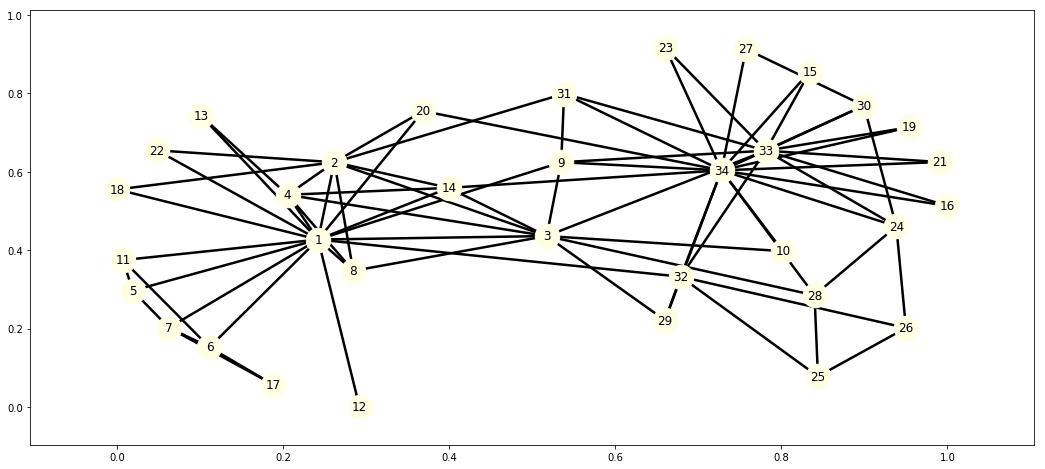

In [5]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(karate_club_graph, node_color='xkcd:off white',
                 width=2.5, node_size=600)

In [6]:

degree_centrality = nx.degree_centrality(karate_club_graph)
print(degree_centrality[34])
print(degree_centrality[33])

0.5151515151515151
0.36363636363636365


In [7]:

disconnected_dipraph = nx.DiGraph()
disconnected_dipraph.add_nodes_from([chr(i) for i in range(65, 80)])
disconnected_dipraph.add_edges_from([('A', 'B'), ('A', 'E'), ('A', 'N'), ('B', 'C'), ('B', 'E'),
                                     ('C', 'A'), ('C', 'D'), ('D', 'B'), ('D', 'E'),
                                     ('E', 'C'), ('E', 'D'), ('F', 'G'), ('G', 'A'), ('G', 'J'),
                                     ('H', 'G'), ('H', 'I'), ('I', 'F'), ('I', 'G'), ('I', 'H'), ('I', 'J'),
                                     ('J', 'F'), ('J', 'O'), ('K', 'L'), ('K', 'M'), ('L', 'M'),
                                     ('N', 'L'), ('N', 'O'), ('O', 'J'), ('O', 'K'), ('O', 'L')])

C:\Users\dev\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\dev\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\dev\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


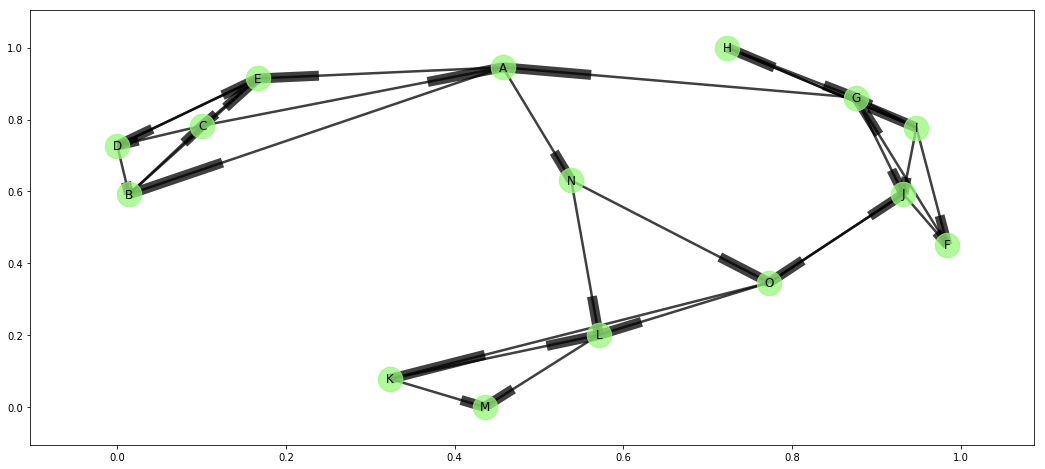

In [8]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(disconnected_dipraph, node_color='xkcd:light green',
                 alpha=.75, width=2.5, node_size=600)

In [9]:

# The degree centrality for a node v is the fraction of nodes it
# is connected to
degree_centrality = nx.degree_centrality(disconnected_dipraph)

# The in-degree centrality for a node v is the fraction of nodes its
# incoming edges are connected to
in_degree_centrality = nx.in_degree_centrality(disconnected_dipraph)
print(in_degree_centrality['A'])
print(in_degree_centrality['L'])

# The out-degree centrality for a node v is the fraction of nodes its
# outgoing edges are connected to
out_degree_centrality = nx.out_degree_centrality(disconnected_dipraph)
print(out_degree_centrality['A'])
print(out_degree_centrality['L'])

0.14285714285714285
0.21428571428571427
0.21428571428571427
0.07142857142857142


In [10]:

from IPython.display import HTML

HTML('<img src="../../saves/png/disconnect_nodes.png" />')

In [18]:

# Closeness centrality of node L is the reciprocal of the
# average shortest path distance to L over all n-1 reachable nodes
print('{:.3} = ({}-1)/{} = {:.3}'.format(nx.closeness_centrality(karate_club_graph, u=32, normalized=False),
                                 len(karate_club_graph.nodes()),
                                 sum(nx.shortest_path_length(karate_club_graph, source=32).values()),
                                 (len(karate_club_graph.nodes())-1)/sum(nx.shortest_path_length(karate_club_graph,
                                                                                                source=32).values())))

0.541 = (34-1)/61 = 0.541


In [15]:
nx.shortest_path_length?

In [39]:

# Closeness centrality of node L is the reciprocal of the
# average shortest path distance to L over all n-1 reachable nodes
nx.closeness_centrality(disconnected_dipraph, u='L', wf_improved=False, reverse=True)

1.0

In [40]:

# Wasserman and Faust propose an improved formula for graphs with
# more than one connected component. The result is "a ratio of the
# fraction of actors in the group who are reachable, to the average
# distance" from the reachable actor
nx.closeness_centrality(disconnected_dipraph, u='L', wf_improved=True, reverse=True)

0.07142857142857142


Which node has the highest closeness centrality under option 1, where we only consider the distance to reachable nodes? _Note: the closeness centrality of nodes that cannot reach any other nodes is always zero._

A 0.5
B 0.6666666666666666
C 1.0
D 0.0


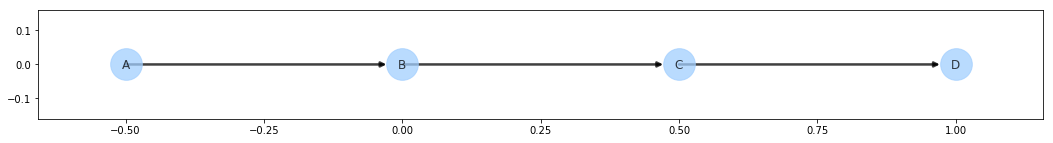

In [28]:

import numpy as np

disconnected_dipraph = nx.DiGraph()
node_list = [chr(i) for i in range(65, 69)]
disconnected_dipraph.add_nodes_from(node_list)
disconnected_dipraph.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D')])

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 2))
pos = {'A': np.array([-0.5, 0]),
       'B': np.array([0, 0]),
       'C': np.array([0.5, 0]),
       'D': np.array([1, 0])}
nx.draw_networkx(disconnected_dipraph, pos, node_color='xkcd:baby blue',
                 alpha=.75, width=2.5, node_size=1000)
for node in node_list:
    print(node, nx.closeness_centrality(disconnected_dipraph, u=node, wf_improved=False, reverse=True))


Which node has the highest closeness centrality under option 2, where we normalize by the fraction of nodes a node can reach? _Note: the closeness centrality of nodes that cannot reach any other nodes is always zero._

In [36]:

for node in node_list:
    print(node, nx.closeness_centrality(disconnected_dipraph, u=node, wf_improved=True, reverse=True))

A 0.354679802955665
B 0.22857142857142856
C 0.277992277992278
D 0.19047619047619047



Given the following network, which node has the highest betweenness (excluding endpoints)? What’s the betweenness score (excluding endpoints) of this node? _Give your answer in the following format: X, #_

In [24]:

betweenness_graph = nx.Graph()
node_list = [chr(i) for i in range(65, 72)]
betweenness_graph.add_nodes_from(node_list)
betweenness_graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'),
                                  ('D', 'E'), ('E', 'F'), ('E', 'G'), ('F', 'G')])

C:\Users\dev\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\dev\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\dev\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


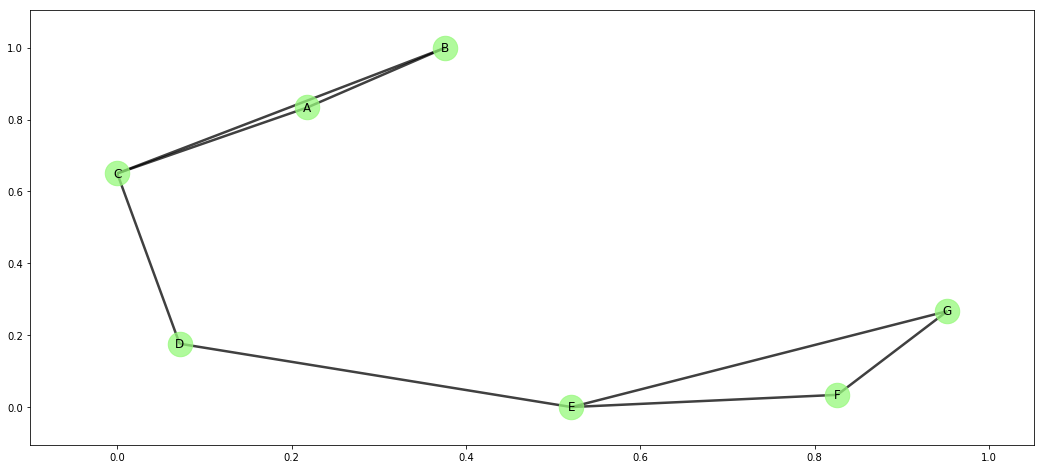

In [25]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(betweenness_graph, node_color='xkcd:light green',
                 alpha=.75, width=2.5, node_size=600)

In [41]:

betweenness_centrality = nx.betweenness_centrality(betweenness_graph, normalized=False, endpoints=False)
for node in node_list:
    print(node, betweenness_centrality[node])

A 0.0
B 0.0
C 8.0
D 9.0
E 8.0
F 0.0
G 0.0



For the same network, what is the normalized betweenness centrality (excluding endpoints) of node D?

In [42]:

nx.betweenness_centrality(betweenness_graph, normalized=True, endpoints=False)['D']

0.6

In [45]:

import operator

betweenness_centrality = nx.betweenness_centrality(karate_club_graph, normalized=False, endpoints=False)
sorted(betweenness_centrality.items(), key=operator.itemgetter(1), reverse=True)[0:5]

[(1, 231.07142857142864), (34, 160.5515873015873), (33, 76.69047619047622), (3, 75.85079365079365), (32, 73.00952380952381)]

In [40]:

%pprint

dir(operator)

Pretty printing has been turned OFF


['__abs__', '__add__', '__all__', '__and__', '__builtins__', '__cached__', '__concat__', '__contains__', '__delitem__', '__doc__', '__eq__', '__file__', '__floordiv__', '__ge__', '__getitem__', '__gt__', '__iadd__', '__iand__', '__iconcat__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__inv__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__itruediv__', '__ixor__', '__le__', '__loader__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__name__', '__ne__', '__neg__', '__not__', '__or__', '__package__', '__pos__', '__pow__', '__rshift__', '__setitem__', '__spec__', '__sub__', '__truediv__', '__xor__', '_abs', 'abs', 'add', 'and_', 'attrgetter', 'concat', 'contains', 'countOf', 'delitem', 'eq', 'floordiv', 'ge', 'getitem', 'gt', 'iadd', 'iand', 'iconcat', 'ifloordiv', 'ilshift', 'imatmul', 'imod', 'imul', 'index', 'indexOf', 'inv', 'invert', 'ior', 'ipow', 'irshift', 'is_', 'is_not', 'isub', 'itemgetter', 'itruedi